# Wrangle and Analyze Data
## Introduction
In this project I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Dataset Description
This project will utilize three datasets
- `twitter-archive-enhanced.csv`: The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

- `tweets.txt`: Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Hence, we going to query the tweets based on the tweet IDs via tweepy.

- `image-predictions.tvs`: This dataset consists the prediction every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). 

## Getting Started

In [1]:
# import the libraries we need
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import json
import tweepy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the twitter-archive-enhanced.csv as dataframe
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# request the image_predictions.tsv via request and export it as tsv
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
image_predictions = pd.read_csv(BytesIO(data.content), sep = '\t')
image_predictions.to_csv('image-predictions.tsv', sep='\t', )

In [4]:
consumer_key = ""
consumer_secret = ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [5]:
# gather all the tweets data and write it to .txt file
with open("tweets.txt", "w") as outfile: 
    for tweet_id in twitter_archives["tweet_id"]: 
        try: 
            tweet = api.get_status(tweet_id, tweet_mode = "extended") 
            json.dump(tweet._json, outfile) 
            outfile.write("\n") 
        except Exception as e:
            pass

In [6]:
# read all tweets data to dataframe
data = []
with open('tweets.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

## Assessing  Dataset
### Twitter archives

In [7]:
twitter_archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archives.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [10]:
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archives["name"].value_counts().head()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Name: name, dtype: int64

### Twitter API Data

In [12]:
tweet_api_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [13]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 32 columns):
created_at                       2200 non-null object
id                               2200 non-null int64
id_str                           2200 non-null object
full_text                        2200 non-null object
truncated                        2200 non-null bool
display_text_range               2200 non-null object
entities                         2200 non-null object
extended_entities                1948 non-null object
source                           2200 non-null object
in_reply_to_status_id            73 non-null float64
in_reply_to_status_id_str        73 non-null object
in_reply_to_user_id              73 non-null float64
in_reply_to_user_id_str          73 non-null object
in_reply_to_screen_name          73 non-null object
user                             2200 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [14]:
tweet_api_data.isnull().sum() / len(tweet_api_data)

created_at                       0.000000
id                               0.000000
id_str                           0.000000
full_text                        0.000000
truncated                        0.000000
display_text_range               0.000000
entities                         0.000000
extended_entities                0.114545
source                           0.000000
in_reply_to_status_id            0.966818
in_reply_to_status_id_str        0.966818
in_reply_to_user_id              0.966818
in_reply_to_user_id_str          0.966818
in_reply_to_screen_name          0.966818
user                             0.000000
geo                              1.000000
coordinates                      1.000000
place                            0.999545
contributors                     1.000000
is_quote_status                  0.000000
retweet_count                    0.000000
favorite_count                   0.000000
favorited                        0.000000
retweeted                        0

In [15]:
tweet_api_data["entities"][0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}},
   'features': {'orig': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'medium': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'small': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'large': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]}}}]}

In [16]:
tweet_api_data["extended_entities"][0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}},
   'features': {'orig': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'medium': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'small': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]},
    'large': {'faces': [{'x': 143, 'y': 380, 'h': 53, 'w': 53}]}}}]}

### Image Prediction

In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

### Summary
#### Quality
##### Twitter Archives
- Column timestamp should be datetime instead of object
- Column source is wrapped in html
- Column rating_numerator contains false data; all the data should be greater than 10
- Column rating_denominator contains false data; all the data should equal to 10
- Column name contains false data, some dogs' name are None and a
- doggo, floofer, pupper, puppo columns should be combined into a single column as this is one variable that identify stage of dog

##### Twitter API Data
- Contains retweet data*
- Column entities contains redundent data
- Column extended_entities contains redundent data

##### Image Prediction
- Some jpg_url are duplicated

#### Tidiness
- tweet_api_data and image_predictions should be part of twitter_archive table
- Entities data seems to contain image information which are already contained in the twitter archive data, like the image_url and extended url
- Extended entities column contains duplicate information of the entity’s column

## Data Wrangling
We need to solve the data quality/ tidiness problems in order to perform analysis on this dataset. We'll solve the problem based on the order shown above.

In [20]:
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

In [21]:
# Problem: Column timestamp should be datetime instead of object
# Define: Change the timestamp to datatime
twitter_archives_clean["timestamp"] = pd.to_datetime(twitter_archives_clean["timestamp"])

# Test
type(twitter_archives_clean["timestamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
# Problem: Column rating_numerator contains false data, all the data should be greater than 10
# Define: Extract the rows that the rating_numerator greater than 10
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean["rating_numerator"] >= 10]

# Test
twitter_archives_clean["rating_numerator"].describe()

count    1916.000000
mean       14.495825
std        50.765662
min        10.000000
25%        11.000000
50%        12.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [23]:
# Problem: Column rating_denominator contains false data, all the data should equal to 10
# Define: Extract the rows that the rating_denominator equal to 10
twitter_archives_clean = twitter_archives_clean[twitter_archives_clean["rating_denominator"] == 10]

# Test
twitter_archives_clean["rating_denominator"].describe()

count    1899.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [24]:
# Problem: Column name contains false data, some dogs' name are None and a
# Define: Drop the rows that the name contains None or a
twitter_archives_clean = twitter_archives_clean[~twitter_archives_clean["name"].str.contains("None")]
twitter_archives_clean = twitter_archives_clean[~twitter_archives_clean["name"].str.contains("a")]

# Test
print(len(twitter_archives_clean[twitter_archives_clean["name"].str.contains("None")]))
print(len(twitter_archives_clean[twitter_archives_clean["name"].str.contains("a")]))

0
0


In [50]:
# Problem: doggo, floofer, pupper, puppo columns should be combined into a single column as this is one variable that identify stage of dog
# Define: Melt, filter out the None value and combine with twitter_archives_clean table
temp = pd.melt(twitter_archives_clean, id_vars =["tweet_id"], value_vars =["doggo", "floofer", "pupper", "puppo"]) 
temp = temp[temp["value"] != "None"]
twitter_archives_clean = twitter_archives_clean.merge(temp, how="left")
twitter_archives_clean = twitter_archives_clean.drop(columns=["doggo", "floofer", "pupper", "puppo", "variable"], axis=1)
twitter_archives_clean = twitter_archives_clean.rename(columns={"value":"stages"})

# Test
twitter_archives_clean["stages"].value_counts()

pupper     71
doggo      37
puppo      11
floofer     4
Name: stages, dtype: int64

In [25]:
# Problem: Contains retweet data
# Define: Remove retweet data based on retweet status
tweet_api_data_clean = tweet_api_data_clean[tweet_api_data_clean["retweeted_status"].isnull()]

# Test
tweet_api_data_clean["retweeted_status"].unique()

array([nan], dtype=object)

In [26]:
# Problem: Column entities contains redundent data
# Define: Drop the column
tweet_api_data_clean = tweet_api_data_clean.drop("entities", axis=1)

# Test
"entities" in tweet_api_data_clean.columns.to_list()

False

In [27]:
# Problem: Column extended_entities contains redundent data
# Define: Drop the column
tweet_api_data_clean = tweet_api_data_clean.drop("extended_entities", axis=1)

# Test
"entiextended_entitiesties" in tweet_api_data_clean.columns.to_list()

False

In [28]:
# Problem: Some jpg_url are duplicated
# Define: Drop duplicated data (keep the first one)
image_predictions_clean = image_predictions_clean.drop_duplicates("jpg_url")

# Test
image_predictions_clean["jpg_url"].nunique() / len(image_predictions_clean)

1.0

In [29]:
# Problem: tweet_api_data and image_predictions should be part of twitter_archive table
# Define: Merge three dataframes
tweet_api_data_clean = tweet_api_data_clean.rename(columns={"id": "tweet_id"})
master_data = twitter_archives_clean.merge(tweet_api_data_clean, on="tweet_id")
master_data = master_data.merge(image_predictions_clean, on="tweet_id")

# Test, we need to plus two because we merge the dataframe twice on same column
len(twitter_archives_clean.columns) + len(tweet_api_data_clean.columns) + len(image_predictions_clean.columns) == (len(master_data.columns) + 2)

True

In [30]:
master_data.to_csv("twitter_archive_master.csv", encoding="utf-8-sig")

## Visualization

In [31]:
master_data.head(1)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [32]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 548
Data columns (total 57 columns):
tweet_id                         549 non-null int64
in_reply_to_status_id_x          0 non-null float64
in_reply_to_user_id_x            0 non-null float64
timestamp                        549 non-null datetime64[ns, UTC]
source_x                         549 non-null object
text                             549 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    549 non-null object
rating_numerator                 549 non-null int64
rating_denominator               549 non-null int64
name                             549 non-null object
doggo                            549 non-null object
floofer                          549 non-null object
pupper                           549 non-null object
puppo                            549 non-nu

### Top of on @weRateDogs

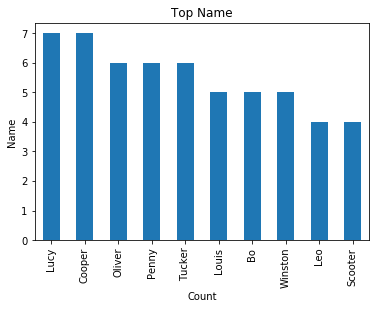

In [42]:
master_data["name"].value_counts().head(10).plot.bar()
plt.title("Top Name")
plt.xlabel("Count")
plt.ylabel("Name")
plt.savefig("top_name.png")

### Trend of the Popularity of @weRateDogs

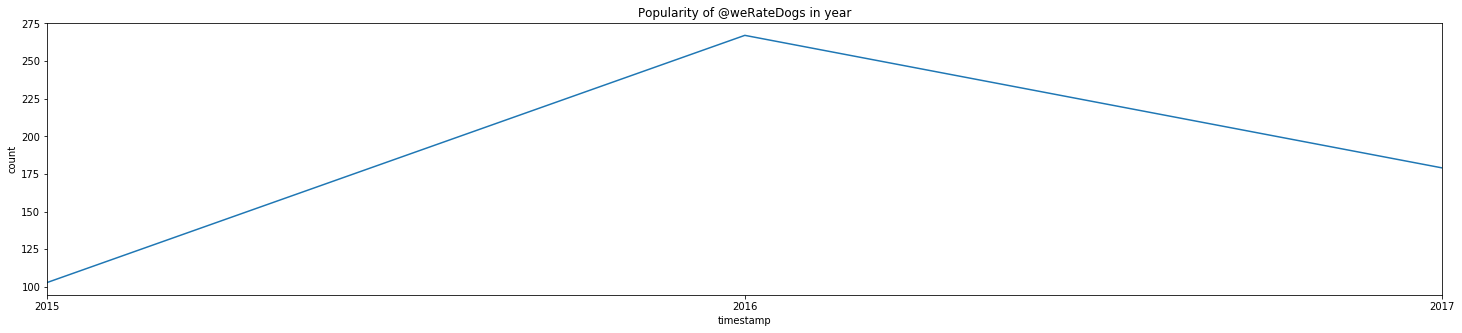

In [43]:
plt.figure(figsize=(25,5))
master_data.groupby(master_data["timestamp"].dt.to_period("Y")).count()["tweet_id"].plot()
plt.title("Popularity of @weRateDogs in year")
plt.ylabel("count")
plt.savefig("popularity_y.png")

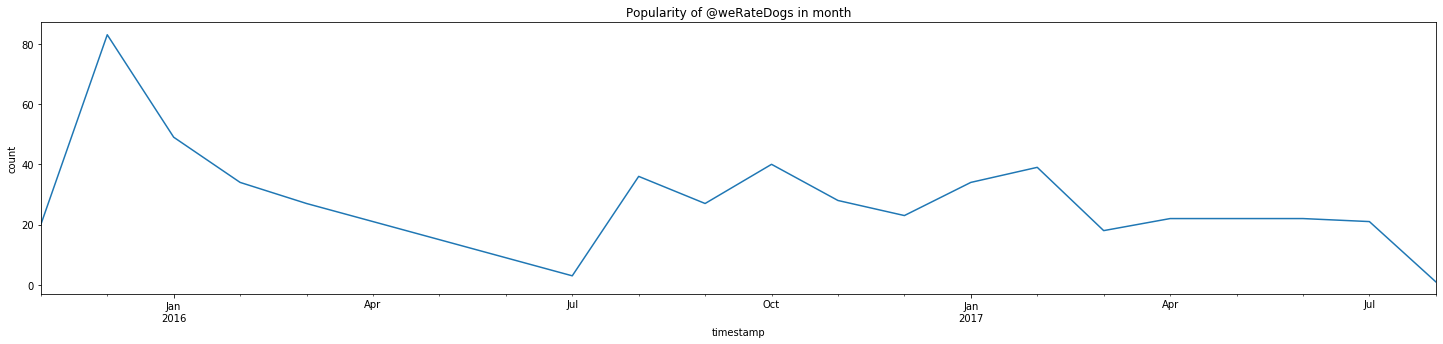

In [44]:
plt.figure(figsize=(25,5))
master_data.groupby(master_data["timestamp"].dt.to_period("M")).count()["tweet_id"].plot()
plt.title("Popularity of @weRateDogs in month")
plt.ylabel("count")
plt.savefig("popularity_m.png")

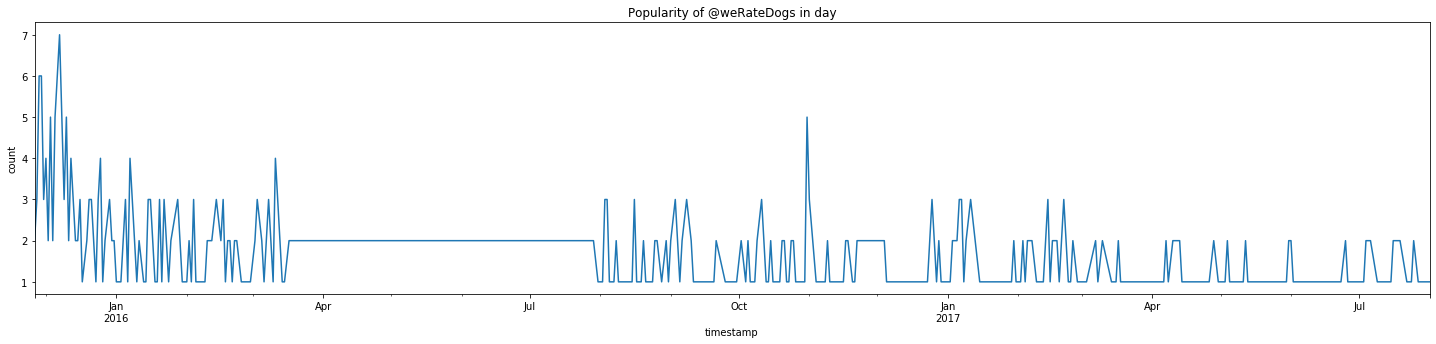

In [45]:
plt.figure(figsize=(25,5))
master_data.groupby(master_data["timestamp"].dt.to_period("D")).count()["tweet_id"].plot()
plt.title("Popularity of @weRateDogs in day")
plt.ylabel("count")
plt.savefig("popularity_d.png")

### The trend of Favorite Count and Retweet Count

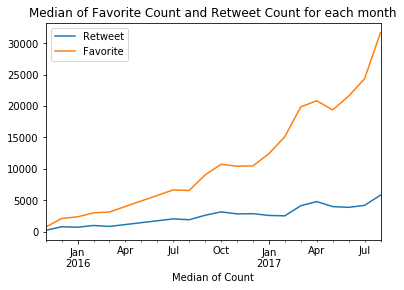

In [46]:
master_data.groupby(master_data["timestamp"].dt.to_period("M")).median()['retweet_count'].plot(label="Retweet")
master_data.groupby(master_data["timestamp"].dt.to_period("M")).median()['favorite_count'].plot(label="Favorite")
plt.title("Median of Favorite Count and Retweet Count for each month")
plt.xlabel("Median of Count")
plt.legend()
plt.savefig("favorite_retweet.png")